<a href="https://colab.research.google.com/github/laiananardi/integration_of_bibliographic_data/blob/main/integration_of_bibliographic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load CAPES data using the API.

 how to use the API:  https://dadosabertos.capes.gov.br/pt_BR/api/1/util/snippet/api_info.html?resource_id=a5e72d15-0c0b-4fcb-9471-4fca804d4cff

The API is a great way to optimize and automate data integration.

To extract data from the API, we need to paginate the data because the API returns the data with a limit of 100 records. The API provides us with the total number of records and the URL of the next record. We will use this information to paginate and add the data to our DataFrame.


In [4]:
import requests
import pandas as pd
import math

url_base = 'https://dadosabertos.capes.gov.br'

def request_data(url):
    body = requests.get(url)
    response = body.json()
    return response

# First batch
url_first = url_base + '/api/3/action/datastore_search?resource_id=3e993ac4-9eab-4373-9a92-5f6c6f68bc34'
data_first = request_data(url_first)

total_size = data_first['result']['total']
next_page_url = data_first['result']['_links']['next']
batch_size = data_first['result']['limit']

print(f'Total size: {total_size}')
print(f'Next URL: {next_page_url}')

# Create dataframe with the first batch
df_api = pd.DataFrame.from_dict(data_first['result']['records'])

# Calculate the number of batches required to fetch all data from the API
i = 0
number_batches = math.floor(total_size / batch_size)

print('START OF THE LOOP....')

for i in range(number_batches):
    url_next = url_base + next_page_url
    data = request_data(url_next)

    if data['result']['total_was_estimated'] == False:
        # Update the URL of the next page
        next_page_url = data['result']['_links']['next']
    else:
        pass

    # Append batch to the dataframe
    df_api_batch = pd.DataFrame.from_dict(data['result']['records'])
    df_api = pd.concat([df_api, df_api_batch], ignore_index=True)

print('END OF THE LOOP!')


Total size: 1500
Next URL: /api/3/action/datastore_search?resource_id=3e993ac4-9eab-4373-9a92-5f6c6f68bc34&offset=100
START OF THE LOOP....
END OF THE LOOP!


# Processing the CAPES dataset

In [6]:
df_api

,_id,CD_PROGRAMA_IES,NM_PROGRAMA_IES,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,AN_BASE,ID_ADD_PRODUCAO_INTELECTUAL,ID_PRODUCAO_INTELECTUAL,NM_PRODUCAO,ID_TIPO_PRODUCAO,...,NM_LINHA_PESQUISA,ID_PROJETO,NM_PROJETO,DH_INICIO_AREA_CONC,DH_FIM_AREA_CONC,DH_INICIO_LINHA,DH_FIM_LINHA,IN_GLOSA,IN_PRODUCAO_COM_VINCULO_TCC,ID_ADD_TRABALHO_CONCLUSAO_CT
0,1,33002010225P1,TECNOLOGIA EM QUÍMICA E BIOQUÍMICA,USP,UNIVERSIDADE DE SÃO PAULO,2017,21957142,5076616,IDENTIFICATION OF HISPIDIN AS A BIOLUMINESCENT...,2,...,POLÍMEROS E BIOMOLÉCULAS,168385.0,BIOLUMINESCÊNCIA EM FUNGOS,01JAN2012:00:00:00.000000,,01JAN2012:00:00:00.000000,,0.0,NÃO,NaN
1,2,33002010225P1,TECNOLOGIA EM QUÍMICA E BIOQUÍMICA,USP,UNIVERSIDADE DE SÃO PAULO,2017,21957161,4032253,THE INTERACTIONS BETWEEN SURFACTANTS AND THE E...,2,...,POLÍMEROS E BIOMOLÉCULAS,168391.0,MACROMOLÉCULAS,01JAN2012:00:00:00.000000,,01JAN2012:00:00:00.000000,,0.0,SIM,NaN
2,3,26001012170P6,INOVAÇÃO E TECNOLOGIA INTEGRADAS À MEDICINA VE...,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,2017,21958210,5214630,CHEMICAL AND MICROBIOLOGICAL CHARACTERIZATION ...,2,...,INOVAÇÃO E DESENVOLVIMENTO DE TECNOLOGIAS EM S...,NaN,,14MAR2016:00:00:00.000000,,06JUN2016:00:00:00.000000,,0.0,NÃO,NaN
3,4,26001012170P6,INOVAÇÃO E TECNOLOGIA INTEGRADAS À MEDICINA VE...,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,2017,21958212,5003821,COLETA DE CÉLULAS PROGENITORAS PERIFÉRICAS POR...,2,...,INOVAÇÃO E DESENVOLVIMENTO DE TECNOLOGIAS EM S...,NaN,,14MAR2016:00:00:00.000000,,06JUN2016:00:00:00.000000,,0.0,NÃO,NaN
4,5,26001012170P6,INOVAÇÃO E TECNOLOGIA INTEGRADAS À MEDICINA VE...,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,2017,21958213,5073883,COLETA DE CÉLULAS PROGENITORAS PERIFÉRICAS POR...,2,...,INOVAÇÃO E DESENVOLVIMENTO DE TECNOLOGIAS EM S...,NaN,,14MAR2016:00:00:00.000000,,06JUN2016:00:00:00.000000,,1.0,NÃO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,32018010040P9,ECOLOGIA,UFSJ,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL-REI,2017,22098912,5611414,OCCURRENCE OF ARBUSCULAR MYCORRHIZAL FUNGI ON ...,2,...,ECOLOGIA DE COMUNIDADES,471546.0,OCORRÊNCIA E DIVERSIDADE DE FUNGOS MICORRÍZICO...,10AUG2015:00:00:00.000000,,10AUG2015:00:00:00.000000,,0.0,NÃO,None
1496,1497,32018010040P9,ECOLOGIA,UFSJ,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL-REI,2017,22098913,5613231,OPTIMISING METHODS FOR DUNG BEETLE (COLEOPTERA...,2,...,PROJETO ISOLADO,NaN,,,,11MAY2015:00:00:00.000000,,1.0,NÃO,None
1497,1498,32018010040P9,ECOLOGIA,UFSJ,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL-REI,2017,22098915,5612338,ORGANIZAÇÃO DA COMUNIDADE E ESTRUTURA FILOGENÉ...,2,...,PROJETO ISOLADO,NaN,,,,11MAY2015:00:00:00.000000,,0.0,NÃO,None
1498,1499,32018010040P9,ECOLOGIA,UFSJ,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL-REI,2017,22098923,5612148,QUANTIFICATION OF FOUR DIFFERENT POST-DISPERSA...,2,...,,NaN,,,,,,0.0,NÃO,None


Em seguida farei as mesmas análises e tratamento que fiz para o dataframe anterior.

In [7]:
df_api.shape

(1500, 28)

In [8]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1500 non-null   int64  
 1   CD_PROGRAMA_IES               1500 non-null   object 
 2   NM_PROGRAMA_IES               1500 non-null   object 
 3   SG_ENTIDADE_ENSINO            1500 non-null   object 
 4   NM_ENTIDADE_ENSINO            1500 non-null   object 
 5   AN_BASE                       1500 non-null   int64  
 6   ID_ADD_PRODUCAO_INTELECTUAL   1500 non-null   int64  
 7   ID_PRODUCAO_INTELECTUAL       1500 non-null   int64  
 8   NM_PRODUCAO                   1500 non-null   object 
 9   ID_TIPO_PRODUCAO              1500 non-null   object 
 10  NM_TIPO_PRODUCAO              1500 non-null   object 
 11  ID_SUBTIPO_PRODUCAO           1500 non-null   int64  
 12  NM_SUBTIPO_PRODUCAO           1500 non-null   object 
 13  ID_

In [9]:
#Count the null values in the DataFrame
df_api.isnull().sum()

_id                                0
CD_PROGRAMA_IES                    0
NM_PROGRAMA_IES                    0
SG_ENTIDADE_ENSINO                 0
NM_ENTIDADE_ENSINO                 0
AN_BASE                            0
ID_ADD_PRODUCAO_INTELECTUAL        0
ID_PRODUCAO_INTELECTUAL            0
NM_PRODUCAO                        0
ID_TIPO_PRODUCAO                   0
NM_TIPO_PRODUCAO                   0
ID_SUBTIPO_PRODUCAO                0
NM_SUBTIPO_PRODUCAO                0
ID_FORMULARIO_PRODUCAO             0
NM_FORMULARIO                      0
ID_AREA_CONCENTRACAO             442
NM_AREA_CONCENTRACAO               0
ID_LINHA_PESQUISA                453
NM_LINHA_PESQUISA                  0
ID_PROJETO                       577
NM_PROJETO                         0
DH_INICIO_AREA_CONC                0
DH_FIM_AREA_CONC                   0
DH_INICIO_LINHA                    0
DH_FIM_LINHA                       0
IN_GLOSA                           1
IN_PRODUCAO_COM_VINCULO_TCC        0
I

In [10]:
#Identify duplicate rows where all columns are the same
df_api.loc[df_api.duplicated(keep=False)]

,_id,CD_PROGRAMA_IES,NM_PROGRAMA_IES,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,AN_BASE,ID_ADD_PRODUCAO_INTELECTUAL,ID_PRODUCAO_INTELECTUAL,NM_PRODUCAO,ID_TIPO_PRODUCAO,...,NM_LINHA_PESQUISA,ID_PROJETO,NM_PROJETO,DH_INICIO_AREA_CONC,DH_FIM_AREA_CONC,DH_INICIO_LINHA,DH_FIM_LINHA,IN_GLOSA,IN_PRODUCAO_COM_VINCULO_TCC,ID_ADD_TRABALHO_CONCLUSAO_CT


Como a coluna NM_PRODUCAO possue valores duplicados e podemos ver que o que diferencia os registros é o ID_PRODUCAO_INTELECTUAL vou usar essa coluna como parametro posteriormente quando for pegar o DOI

In [11]:
#Check if the 'ID_PRODUCAO_INTELECTUAL' column has duplicated values
df_api.loc[df_api['ID_PRODUCAO_INTELECTUAL'].duplicated(keep=False)]

,_id,CD_PROGRAMA_IES,NM_PROGRAMA_IES,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,AN_BASE,ID_ADD_PRODUCAO_INTELECTUAL,ID_PRODUCAO_INTELECTUAL,NM_PRODUCAO,ID_TIPO_PRODUCAO,...,NM_LINHA_PESQUISA,ID_PROJETO,NM_PROJETO,DH_INICIO_AREA_CONC,DH_FIM_AREA_CONC,DH_INICIO_LINHA,DH_FIM_LINHA,IN_GLOSA,IN_PRODUCAO_COM_VINCULO_TCC,ID_ADD_TRABALHO_CONCLUSAO_CT


Diferente do csv, a api só traz dados de 2017

In [12]:
#Count the occurrences of each 'AN_BASE' year in the DataFrame
df_api['AN_BASE'].value_counts()

2017    1500
Name: AN_BASE, dtype: int64

In [13]:
#Count the occurrences of each 'NM_SUBTIPO_PRODUCAO' subtype in the DataFrame
df_api['NM_SUBTIPO_PRODUCAO'].value_counts()

ARTIGO EM PERIÓDICO    1499
BIBLIOGRÁFICA             1
Name: NM_SUBTIPO_PRODUCAO, dtype: int64

In [21]:
#Count the occurrences of each 'NM_FORMULARIO' form in the DataFrame
df_api['NM_FORMULARIO'].value_counts()

BIBLIOGRAFICA - ARTIGO EM PERIÓDICO    1499
ARTIGO EM PERIÓDICO                       1
Name: NM_FORMULARIO, dtype: int64

In [17]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.0 MB/s eta 0:00:00


In [18]:
from unidecode import unidecode

df_api['NM_PRODUCAO_CLEAN'] = df_api['NM_PRODUCAO'].apply(lambda x: unidecode(str(x).lower()).replace('&', ''))
df_api[['NM_PRODUCAO_CLEAN', 'NM_PRODUCAO']]

,NM_PRODUCAO_CLEAN,NM_PRODUCAO
0,identification of hispidin as a bioluminescent...,IDENTIFICATION OF HISPIDIN AS A BIOLUMINESCENT...
1,the interactions between surfactants and the e...,THE INTERACTIONS BETWEEN SURFACTANTS AND THE E...
2,chemical and microbiological characterization ...,CHEMICAL AND MICROBIOLOGICAL CHARACTERIZATION ...
3,coleta de celulas progenitoras perifericas por...,COLETA DE CÉLULAS PROGENITORAS PERIFÉRICAS POR...
4,coleta de celulas progenitoras perifericas por...,COLETA DE CÉLULAS PROGENITORAS PERIFÉRICAS POR...
...,...,...
1495,occurrence of arbuscular mycorrhizal fungi on ...,OCCURRENCE OF ARBUSCULAR MYCORRHIZAL FUNGI ON ...
1496,optimising methods for dung beetle (coleoptera...,OPTIMISING METHODS FOR DUNG BEETLE (COLEOPTERA...
1497,organizacao da comunidade e estrutura filogene...,ORGANIZAÇÃO DA COMUNIDADE E ESTRUTURA FILOGENÉ...
1498,quantification of four different post-dispersa...,QUANTIFICATION OF FOUR DIFFERENT POST-DISPERSA...


# Integration with the Crossref database to search for DOI (Digital Object Identifier)

Link for searching on the website: https://search.crossref.org

Crossref provides an API that I will use to search for the DOI using the 'NM_PRODUCAO' argument.

API URL: https://api.crossref.org/works?query={}&select=title,DOI

In [28]:
!pip install asyncio
!pip install aiohttp
!pip install fuzzywuzzy
!pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import asyncio
import aiohttp
from fuzzywuzzy import fuzz
import nest_asyncio

#The nest_asyncio function allows the event loop to run within an interactive environment.
nest_asyncio.apply()

async def async_get(session, url):
    async with session.get(url) as response:
        try:
            res = await response.json()
            response.raise_for_status()
            if res['status'] != 'failed':
                return res
            else:
                print(response)
        except Exception as e:
            print(f"Erro ao processar a resposta: {e}")
        return None

async def bound_get(sem, session, url, title, id):
    async with sem:
        async with session.get(url) as response:
            data = await response.json()

        if data is None:
            return (id, None, None, None, None)

        items = data.get('message', {}).get('items', [])

        for item in items:
            if 'title' in item and len(item['title']) > 0:
                similarity_score = fuzz.token_sort_ratio(title, item['title'][0])
                if similarity_score >= 90:
                    if 'author' in item and 'given' in item['author'][0] and 'family' in item['author'][0]:
                        author_name = item['author'][0]['given'] + ' ' + item['author'][0]['family']
                    else:
                        author_name = None
                    return (id, item['title'][0], item['DOI'], author_name, similarity_score)
        return (id, None, None, None, None)

async def main(data):
    tasks = []
    sem = asyncio.Semaphore(20)
    base_url = 'https://api.crossref.org/works?query={}&select=title,DOI,author'

    async with aiohttp.ClientSession() as session:
        for batch_start in range(0, len(data), 50):
            batch_end = min(batch_start + 50, len(data))
            batch_titles = data[batch_start:batch_end]
            for title, id in batch_titles.itertuples(index=False):
                url = base_url.format(title)
                tasks.append(asyncio.create_task(bound_get(sem, session, url, title, id)))

        return await asyncio.gather(*tasks)

loop = asyncio.get_event_loop()
result = loop.run_until_complete(main(df_api[['NM_PRODUCAO_CLEAN', 'ID_ADD_PRODUCAO_INTELECTUAL']]))


In [29]:
df_crossref = pd.DataFrame(result, columns=['ID_ADD_PRODUCAO_INTELECTUAL', 'TITLE_CROSSREF', 'DOI', 'AUTHOR_NAME', 'SCORE_FUZZ'])
df_crossref

,ID_ADD_PRODUCAO_INTELECTUAL,TITLE_CROSSREF,DOI,AUTHOR_NAME,SCORE_FUZZ
0,21957142,Identification of hispidin as a bioluminescent...,10.1039/c7pp00216e,Yuichi Oba,100.0
1,21957161,The interactions between surfactants and the e...,10.1016/j.cropro.2016.09.019,Tatiana Cardoso Damato,100.0
2,21958210,Chemical and microbiological characterization ...,10.1016/j.jpha.2017.03.004,Erika Tayse da Cruz Almeida,100.0
3,21958212,Coleta de células progenitoras periféricas por...,10.1590/1678-4162-9124,J.O. Bernardo,98.0
4,21958213,Coleta de células progenitoras periféricas por...,10.1590/1678-4162-9124,J.O. Bernardo,98.0
...,...,...,...,...,...
1495,22098912,Occurrence of arbuscular mycorrhizal fungi on ...,10.1590/0001-3765201720170119,MARISÂNGELA V. BARBOSA,100.0
1496,22098913,Optimising Methods for Dung Beetle (Coleoptera...,10.1093/ee/nvx191,César M A Correa,100.0
1497,22098915,ORGANIZAÇÃO DA COMUNIDADE E ESTRUTURA FILOGENÉ...,10.5902/1980509826453,Ana Carolina da Silva,98.0
1498,22098923,Quantification of four different post-dispersa...,10.1017/s0266467417000335,R. F. Braga,100.0


In [31]:
#Merge the two dataframes based on the common column "ID_ADD_PRODUCAO_INTELECTUAL"

df_final = pd.merge(df_api, df_crossref, on='ID_ADD_PRODUCAO_INTELECTUAL')
df_final


,_id,CD_PROGRAMA_IES,NM_PROGRAMA_IES,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,AN_BASE,ID_ADD_PRODUCAO_INTELECTUAL,ID_PRODUCAO_INTELECTUAL,NM_PRODUCAO,ID_TIPO_PRODUCAO,...,DH_INICIO_LINHA,DH_FIM_LINHA,IN_GLOSA,IN_PRODUCAO_COM_VINCULO_TCC,ID_ADD_TRABALHO_CONCLUSAO_CT,NM_PRODUCAO_CLEAN,TITLE_CROSSREF,DOI,AUTHOR_NAME,SCORE_FUZZ
0,1,33002010225P1,TECNOLOGIA EM QUÍMICA E BIOQUÍMICA,USP,UNIVERSIDADE DE SÃO PAULO,2017,21957142,5076616,IDENTIFICATION OF HISPIDIN AS A BIOLUMINESCENT...,2,...,01JAN2012:00:00:00.000000,,0.0,NÃO,NaN,identification of hispidin as a bioluminescent...,Identification of hispidin as a bioluminescent...,10.1039/c7pp00216e,Yuichi Oba,100.0
1,2,33002010225P1,TECNOLOGIA EM QUÍMICA E BIOQUÍMICA,USP,UNIVERSIDADE DE SÃO PAULO,2017,21957161,4032253,THE INTERACTIONS BETWEEN SURFACTANTS AND THE E...,2,...,01JAN2012:00:00:00.000000,,0.0,SIM,NaN,the interactions between surfactants and the e...,The interactions between surfactants and the e...,10.1016/j.cropro.2016.09.019,Tatiana Cardoso Damato,100.0
2,3,26001012170P6,INOVAÇÃO E TECNOLOGIA INTEGRADAS À MEDICINA VE...,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,2017,21958210,5214630,CHEMICAL AND MICROBIOLOGICAL CHARACTERIZATION ...,2,...,06JUN2016:00:00:00.000000,,0.0,NÃO,NaN,chemical and microbiological characterization ...,Chemical and microbiological characterization ...,10.1016/j.jpha.2017.03.004,Erika Tayse da Cruz Almeida,100.0
3,4,26001012170P6,INOVAÇÃO E TECNOLOGIA INTEGRADAS À MEDICINA VE...,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,2017,21958212,5003821,COLETA DE CÉLULAS PROGENITORAS PERIFÉRICAS POR...,2,...,06JUN2016:00:00:00.000000,,0.0,NÃO,NaN,coleta de celulas progenitoras perifericas por...,Coleta de células progenitoras periféricas por...,10.1590/1678-4162-9124,J.O. Bernardo,98.0
4,5,26001012170P6,INOVAÇÃO E TECNOLOGIA INTEGRADAS À MEDICINA VE...,UFAL,UNIVERSIDADE FEDERAL DE ALAGOAS,2017,21958213,5073883,COLETA DE CÉLULAS PROGENITORAS PERIFÉRICAS POR...,2,...,06JUN2016:00:00:00.000000,,1.0,NÃO,NaN,coleta de celulas progenitoras perifericas por...,Coleta de células progenitoras periféricas por...,10.1590/1678-4162-9124,J.O. Bernardo,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,32018010040P9,ECOLOGIA,UFSJ,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL-REI,2017,22098912,5611414,OCCURRENCE OF ARBUSCULAR MYCORRHIZAL FUNGI ON ...,2,...,10AUG2015:00:00:00.000000,,0.0,NÃO,None,occurrence of arbuscular mycorrhizal fungi on ...,Occurrence of arbuscular mycorrhizal fungi on ...,10.1590/0001-3765201720170119,MARISÂNGELA V. BARBOSA,100.0
1496,1497,32018010040P9,ECOLOGIA,UFSJ,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL-REI,2017,22098913,5613231,OPTIMISING METHODS FOR DUNG BEETLE (COLEOPTERA...,2,...,11MAY2015:00:00:00.000000,,1.0,NÃO,None,optimising methods for dung beetle (coleoptera...,Optimising Methods for Dung Beetle (Coleoptera...,10.1093/ee/nvx191,César M A Correa,100.0
1497,1498,32018010040P9,ECOLOGIA,UFSJ,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL-REI,2017,22098915,5612338,ORGANIZAÇÃO DA COMUNIDADE E ESTRUTURA FILOGENÉ...,2,...,11MAY2015:00:00:00.000000,,0.0,NÃO,None,organizacao da comunidade e estrutura filogene...,ORGANIZAÇÃO DA COMUNIDADE E ESTRUTURA FILOGENÉ...,10.5902/1980509826453,Ana Carolina da Silva,98.0
1498,1499,32018010040P9,ECOLOGIA,UFSJ,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL-REI,2017,22098923,5612148,QUANTIFICATION OF FOUR DIFFERENT POST-DISPERSA...,2,...,,,0.0,NÃO,None,quantification of four different post-dispersa...,Quantification of four different post-dispersa...,10.1017/s0266467417000335,R. F. Braga,100.0


In [32]:
df_final.shape

(1500, 33)

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1500 non-null   int64  
 1   CD_PROGRAMA_IES               1500 non-null   object 
 2   NM_PROGRAMA_IES               1500 non-null   object 
 3   SG_ENTIDADE_ENSINO            1500 non-null   object 
 4   NM_ENTIDADE_ENSINO            1500 non-null   object 
 5   AN_BASE                       1500 non-null   int64  
 6   ID_ADD_PRODUCAO_INTELECTUAL   1500 non-null   int64  
 7   ID_PRODUCAO_INTELECTUAL       1500 non-null   int64  
 8   NM_PRODUCAO                   1500 non-null   object 
 9   ID_TIPO_PRODUCAO              1500 non-null   object 
 10  NM_TIPO_PRODUCAO              1500 non-null   object 
 11  ID_SUBTIPO_PRODUCAO           1500 non-null   int64  
 12  NM_SUBTIPO_PRODUCAO           1500 non-null   object 
 13  ID_

In [34]:
#The null values found in the DOI column indicate that no corresponding DOI was found for the title in the search performed on the Crossref API.
df_final.isnull().sum()

_id                                0
CD_PROGRAMA_IES                    0
NM_PROGRAMA_IES                    0
SG_ENTIDADE_ENSINO                 0
NM_ENTIDADE_ENSINO                 0
AN_BASE                            0
ID_ADD_PRODUCAO_INTELECTUAL        0
ID_PRODUCAO_INTELECTUAL            0
NM_PRODUCAO                        0
ID_TIPO_PRODUCAO                   0
NM_TIPO_PRODUCAO                   0
ID_SUBTIPO_PRODUCAO                0
NM_SUBTIPO_PRODUCAO                0
ID_FORMULARIO_PRODUCAO             0
NM_FORMULARIO                      0
ID_AREA_CONCENTRACAO             442
NM_AREA_CONCENTRACAO               0
ID_LINHA_PESQUISA                453
NM_LINHA_PESQUISA                  0
ID_PROJETO                       577
NM_PROJETO                         0
DH_INICIO_AREA_CONC                0
DH_FIM_AREA_CONC                   0
DH_INICIO_LINHA                    0
DH_FIM_LINHA                       0
IN_GLOSA                           1
IN_PRODUCAO_COM_VINCULO_TCC        0
I

In [35]:
#To identify duplicate rows with identical values in all columns
df_final.loc[df_final.duplicated(keep=False)]

,_id,CD_PROGRAMA_IES,NM_PROGRAMA_IES,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,AN_BASE,ID_ADD_PRODUCAO_INTELECTUAL,ID_PRODUCAO_INTELECTUAL,NM_PRODUCAO,ID_TIPO_PRODUCAO,...,DH_INICIO_LINHA,DH_FIM_LINHA,IN_GLOSA,IN_PRODUCAO_COM_VINCULO_TCC,ID_ADD_TRABALHO_CONCLUSAO_CT,NM_PRODUCAO_CLEAN,TITLE_CROSSREF,DOI,AUTHOR_NAME,SCORE_FUZZ


In [36]:
df_final.duplicated().any()

False

# Storing the Results

In [37]:
#Save CSV with the final dataframe.
df_final.to_csv('producoes_bibliograficas_doi.csv', index=False)

Example of how to save data in the Snowflake database.






In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Configure the connection to Snowflake:
user = 'your_username'
password = 'your_password'
account = 'your_account'
warehouse = 'your_warehouse'
database = 'your_database'
schema = 'your_schema'

# Create the connection string
connection_string = f'snowflake://{user}:{password}@{account}/{database}/{schema}?warehouse={warehouse}'

# Create the connection engine
engine = create_engine(connection_string)

# Replace 'table_name' with the name of the table where you want to insert the data
df_final.to_sql('table_name', con=engine, if_exists='replace', index=False)


# Exploratory Data Analysis







In [40]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


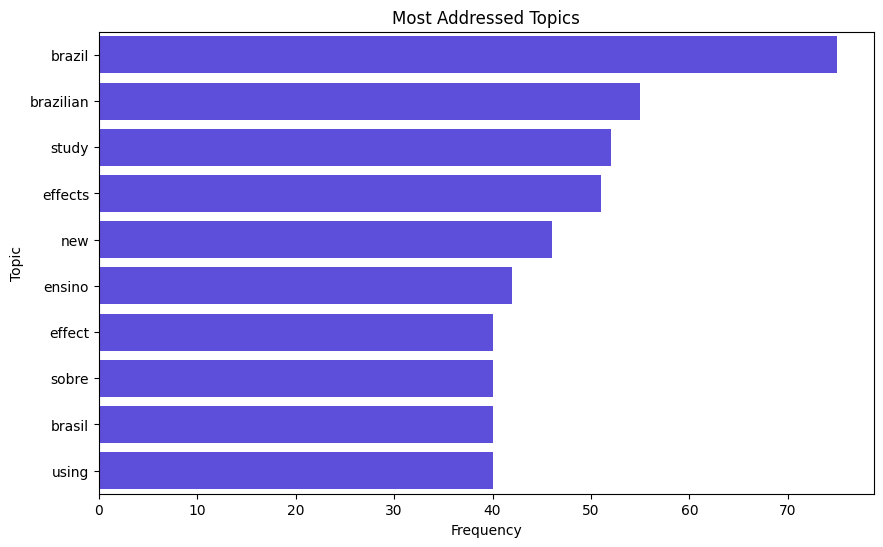

In [60]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords
nltk.download('stopwords')
nltk.download('rslp')  # Required for stemming words in Portuguese

# Get the stopwords in Portuguese and English
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_en = set(stopwords.words('english'))

# Define a function to filter out stopwords and short words
def filter_words(word):
    return word.lower() not in stopwords_pt and word.lower() not in stopwords_en and len(word) >= 3

# Tokenize the words in the 'NM_PRODUCAO_CLEAN' column
words = df_final['NM_PRODUCAO_CLEAN'].str.lower().str.split().explode()

# Remove stopwords and short words
filtered_words = words[words.apply(filter_words)]

# Get the count of the most addressed topics
most_addressed_topics = filtered_words.value_counts().head(10)

# Plot a horizontal bar chart for the most addressed topics
plt.figure(figsize=(10, 6))
sns.barplot(x=most_addressed_topics.values, y=most_addressed_topics.index, color='#4C38F2')
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.title('Most Addressed Topics')
plt.show()

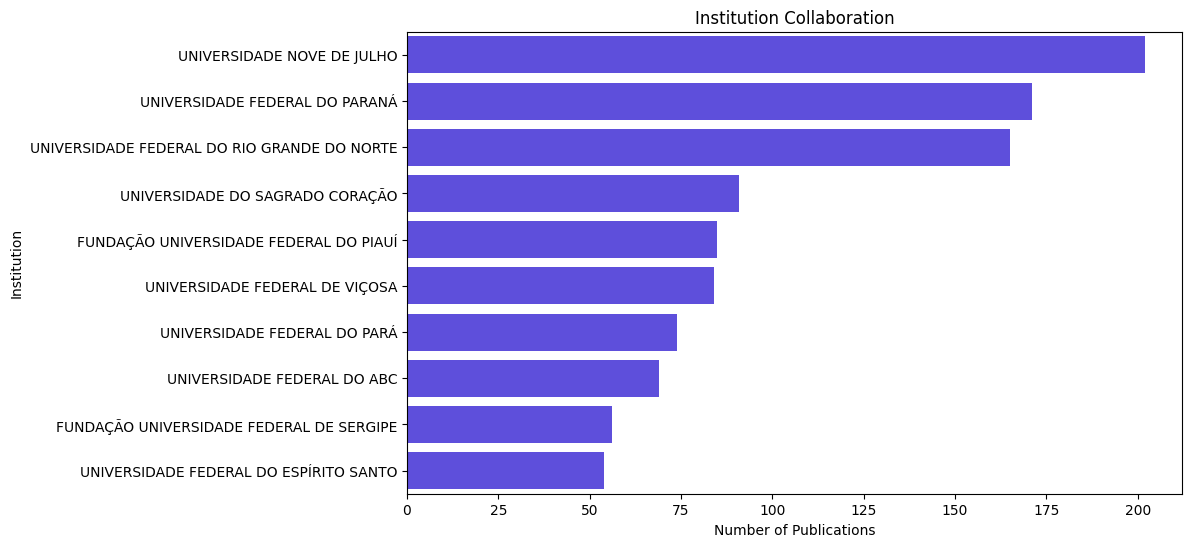

In [61]:
institution_collaboration = df_final['NM_ENTIDADE_ENSINO'].value_counts().head(10)

# Plot a horizontal bar chart for institution collaboration
plt.figure(figsize=(10, 6))
sns.barplot(x=institution_collaboration.values, y=institution_collaboration.index, color='#4C38F2')
plt.xlabel('Number of Publications')
plt.ylabel('Institution')
plt.title('Institution Collaboration')
plt.show()


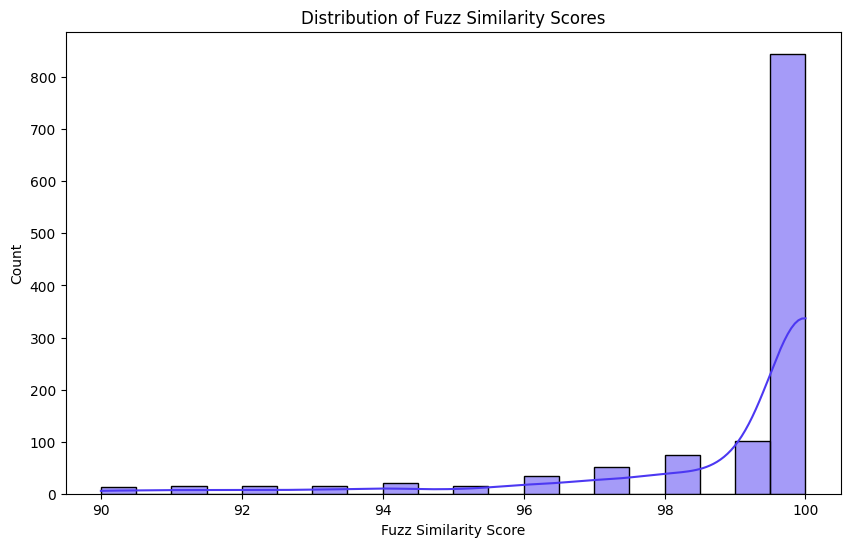

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['SCORE_FUZZ'], bins=20, kde=True, color='#4C38F2')
plt.xlabel('Fuzz Similarity Score')
plt.ylabel('Count')
plt.title('Distribution of Fuzz Similarity Scores')
plt.show()


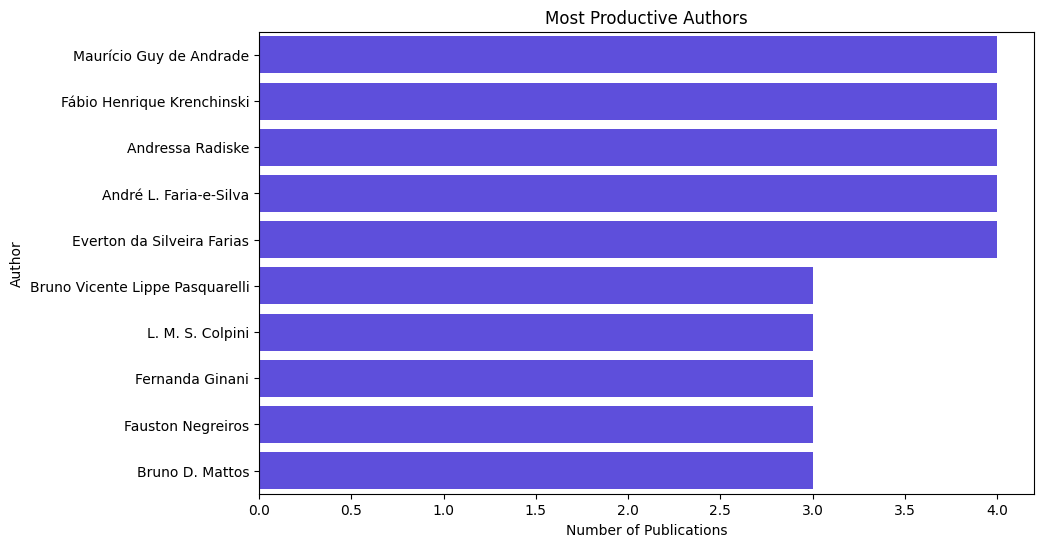

In [63]:
productive_authors = df_final['AUTHOR_NAME'].value_counts().head(10)

# Plot a horizontal bar chart for the most productive authors
plt.figure(figsize=(10, 6))
sns.barplot(x=productive_authors.values, y=productive_authors.index, color='#4C38F2')
plt.xlabel('Number of Publications')
plt.ylabel('Author')
plt.title('Most Productive Authors')
plt.show()


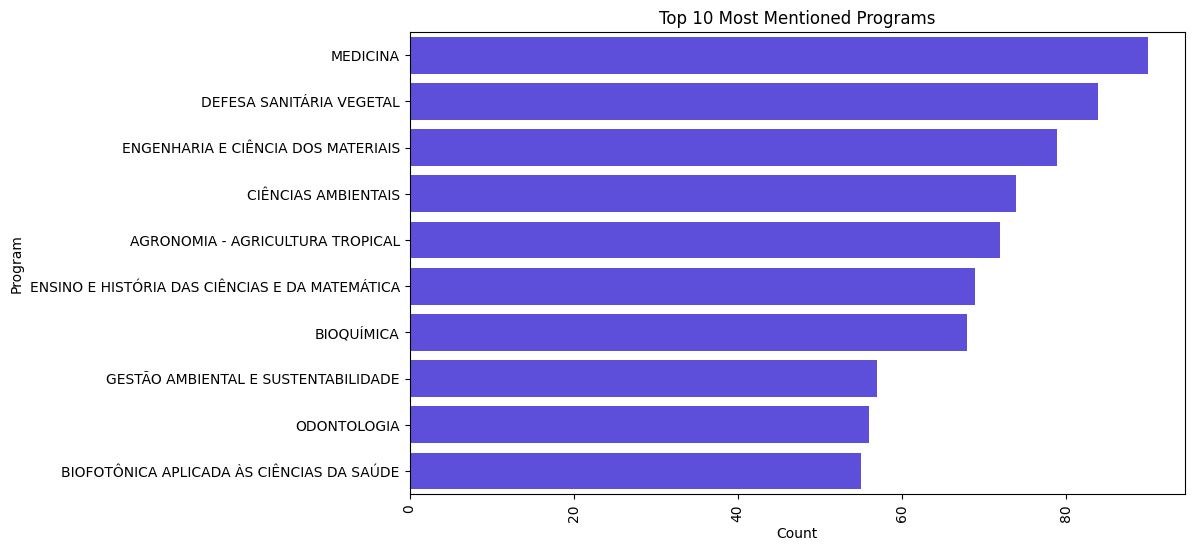

In [76]:
# Program Distribution
# Calculate the count of each program
program_counts = df_final['NM_PROGRAMA_IES'].value_counts().head(10)  # Limit to the top 10 programs

# Create a bar plot to visualize the distribution of programs
plt.figure(figsize=(10, 6))
sns.barplot(x=program_counts.values, y=program_counts.index,  color='#4C38F2')
plt.xlabel('Count')
plt.ylabel('Program')
plt.title('Top 10 Most Mentioned Programs')
plt.xticks(rotation=90)
plt.show()